# PSI projekt - deep learning

## Przygotowanie

In [1]:
import pandas as pd               
import numpy as np          
import matplotlib.pyplot as plt 

In [2]:
train = pd.read_csv('data/dane_poprawione.csv')

In [142]:
len(train)

47231

Transformuję target na format lepszy dla sieci neuronowych

In [3]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
y = ohe.fit_transform(np.array(train['prod_size']).reshape(-1, 1))
y

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'prod_size'], y, random_state=123, test_size=0.20)

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=456, test_size=0.20)

Dalej są missing data i uzupełniam je teraz za pomocą pipeline z płytkich metod. (Nie będzie wycieku informacji, bo nie zmieniam setów do końca notebooka)

In [6]:
X_train.isna().sum()

com_type                  32
x                          0
y                          0
z                          0
Construction               0
Copper                     0
Gold                       0
Iron                       0
Lead                       0
Sand and Gravel            0
Silver                     0
Tungsten                   0
Uranium                    0
Zinc                       0
Other_com1                 0
x0_Leach                   0
x0_Placer                  0
x0_Processing Plant        0
x0_Surface                 0
x0_Surface-Underground     0
x0_Underground             0
x0_Unknown                 0
x0_Well                    0
x0_Occurrence              0
x0_Past Producer           0
x0_Plant                   0
x0_Producer                0
x0_Prospect                0
Chalcocite                 0
Chalcopyrite               0
Galena                     0
Hematite                   0
Magnetite                  0
Malachite                  0
Pyrite        

In [7]:
X_valid.isna().sum()

com_type                  10
x                          0
y                          0
z                          0
Construction               0
Copper                     0
Gold                       0
Iron                       0
Lead                       0
Sand and Gravel            0
Silver                     0
Tungsten                   0
Uranium                    0
Zinc                       0
Other_com1                 0
x0_Leach                   0
x0_Placer                  0
x0_Processing Plant        0
x0_Surface                 0
x0_Surface-Underground     0
x0_Underground             0
x0_Unknown                 0
x0_Well                    0
x0_Occurrence              0
x0_Past Producer           0
x0_Plant                   0
x0_Producer                0
x0_Prospect                0
Chalcocite                 0
Chalcopyrite               0
Galena                     0
Hematite                   0
Magnetite                  0
Malachite                  0
Pyrite        

In [8]:
X_test.isna().sum()

com_type                  13
x                          0
y                          0
z                          0
Construction               0
Copper                     0
Gold                       0
Iron                       0
Lead                       0
Sand and Gravel            0
Silver                     0
Tungsten                   0
Uranium                    0
Zinc                       0
Other_com1                 0
x0_Leach                   0
x0_Placer                  0
x0_Processing Plant        0
x0_Surface                 0
x0_Surface-Underground     0
x0_Underground             0
x0_Unknown                 0
x0_Well                    0
x0_Occurrence              0
x0_Past Producer           0
x0_Plant                   0
x0_Producer                0
x0_Prospect                0
Chalcocite                 0
Chalcopyrite               0
Galena                     0
Hematite                   0
Magnetite                  0
Malachite                  0
Pyrite        

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [10]:
preprocessor = Pipeline(
    [
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('ct', ColumnTransformer([('ohe', OneHotEncoder(sparse_output=False), [0])], remainder='passthrough')),
        ('scaler', StandardScaler())
    ])

In [11]:
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.fit_transform(X_valid)
X_test = preprocessor.fit_transform(X_test)

In [141]:
len(X_train)

30227

## Sieci neuronowe

In [12]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint

In [76]:
deep_results_test = {}

### Podejście 1

In [75]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(100,activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(20,activation="relu"))
model.add(Dense(6,activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               5300      
                                                                 
 dense_1 (Dense)             (None, 20)                2020      
                                                                 
 dense_2 (Dense)             (None, 6)                 126       
                                                                 
Total params: 7,446
Trainable params: 7,446
Non-trainable params: 0
_________________________________________________________________


In [77]:
# model.load_weights("wagi_wersja_1.h5")
# deep_results_test['DNN1'] = model.evaluate(X_test, y_test)[1]

296/296 [==============================] - 1s 2ms/step - loss: 0.6080 - accuracy: 0.8075


In [15]:
save_best_model = ModelCheckpoint("wagi_wersja_1.h5", save_best_only=True)

In [16]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=50, callbacks=[save_best_model])

Epoch 1/50
945/945 [==============================] - 3s 2ms/step - loss: 0.7470 - accuracy: 0.7543 - val_loss: 0.6438 - val_accuracy: 0.7854
Epoch 2/50
945/945 [==============================] - 2s 2ms/step - loss: 0.6316 - accuracy: 0.7819 - val_loss: 0.6346 - val_accuracy: 0.7850
Epoch 3/50
945/945 [==============================] - 2s 2ms/step - loss: 0.6114 - accuracy: 0.7880 - val_loss: 0.6210 - val_accuracy: 0.7926
Epoch 4/50
945/945 [==============================] - 2s 2ms/step - loss: 0.5956 - accuracy: 0.7902 - val_loss: 0.6128 - val_accuracy: 0.7934
Epoch 5/50
945/945 [==============================] - 2s 2ms/step - loss: 0.5836 - accuracy: 0.7963 - val_loss: 0.6005 - val_accuracy: 0.7950
Epoch 6/50
945/945 [==============================] - 2s 2ms/step - loss: 0.5715 - accuracy: 0.7975 - val_loss: 0.6005 - val_accuracy: 0.7969
Epoch 7/50
945/945 [==============================] - 2s 2ms/step - loss: 0.5615 - accuracy: 0.8011 - val_loss: 0.5972 - val_accuracy: 0.7997
Epoch 

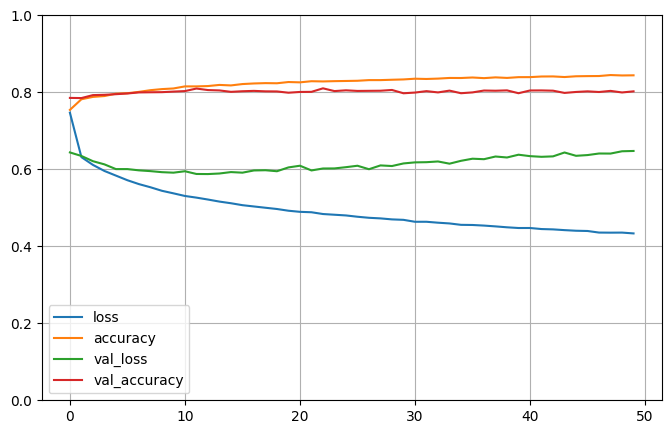

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Trochę overfituje

### Podejście 2

In [78]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(1000,activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(500,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(6,activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

save_best_model = ModelCheckpoint("wagi_wersja_2.h5", save_best_only=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              53000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 6)                 306       
                                                                 
Total params: 608,956
Trainable params: 608,956
Non-trainable params: 0
_________________________________________________________________


In [79]:
# model.load_weights("wagi_wersja_2.h5")
# deep_results_test['DNN2'] = model.evaluate(X_test, y_test)[1]

296/296 [==============================] - 1s 4ms/step - loss: 0.6058 - accuracy: 0.8145


In [34]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=50, callbacks=[save_best_model])

Epoch 1/50
945/945 [==============================] - 9s 9ms/step - loss: 0.6922 - accuracy: 0.7668 - val_loss: 0.6435 - val_accuracy: 0.7790
Epoch 2/50
945/945 [==============================] - 8s 9ms/step - loss: 0.6283 - accuracy: 0.7841 - val_loss: 0.6211 - val_accuracy: 0.7921
Epoch 3/50
945/945 [==============================] - 10s 10ms/step - loss: 0.5969 - accuracy: 0.7933 - val_loss: 0.5909 - val_accuracy: 0.8020
Epoch 4/50
945/945 [==============================] - 9s 9ms/step - loss: 0.5698 - accuracy: 0.8042 - val_loss: 0.6136 - val_accuracy: 0.7978
Epoch 5/50
945/945 [==============================] - 8s 9ms/step - loss: 0.5517 - accuracy: 0.8095 - val_loss: 0.5861 - val_accuracy: 0.8056
Epoch 6/50
945/945 [==============================] - 8s 8ms/step - loss: 0.5270 - accuracy: 0.8145 - val_loss: 0.5781 - val_accuracy: 0.8071
Epoch 7/50
945/945 [==============================] - 8s 9ms/step - loss: 0.5095 - accuracy: 0.8204 - val_loss: 0.5739 - val_accuracy: 0.8163
Epoc

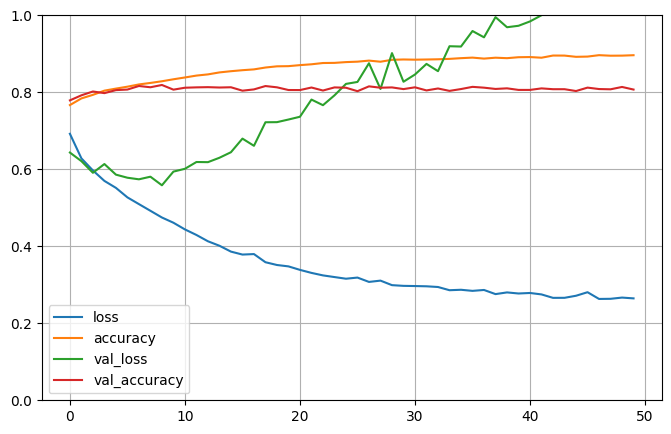

In [35]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Podejście 3

In [37]:
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.callbacks import EarlyStopping

In [80]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(1000, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(500, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(100, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(6,activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

save_best_model = ModelCheckpoint("wagi_wersja_3.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              52000     
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500000    
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 500)               0

In [81]:
# model.load_weights("wagi_wersja_3.h5")
# deep_results_test['DNN3'] = model.evaluate(X_test, y_test)[1]

296/296 [==============================] - 1s 4ms/step - loss: 0.5796 - accuracy: 0.8154


In [43]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=50, callbacks=[save_best_model])

Epoch 1/50
945/945 [==============================] - 13s 12ms/step - loss: 0.7187 - accuracy: 0.7574 - val_loss: 0.6269 - val_accuracy: 0.7880
Epoch 2/50
945/945 [==============================] - 11s 12ms/step - loss: 0.6286 - accuracy: 0.7834 - val_loss: 0.6217 - val_accuracy: 0.7892
Epoch 3/50
945/945 [==============================] - 10s 10ms/step - loss: 0.6037 - accuracy: 0.7904 - val_loss: 0.6076 - val_accuracy: 0.7917
Epoch 4/50
945/945 [==============================] - 11s 11ms/step - loss: 0.5916 - accuracy: 0.7930 - val_loss: 0.5876 - val_accuracy: 0.8007
Epoch 5/50
945/945 [==============================] - 11s 12ms/step - loss: 0.5742 - accuracy: 0.7989 - val_loss: 0.5663 - val_accuracy: 0.8106
Epoch 6/50
945/945 [==============================] - 10s 10ms/step - loss: 0.5574 - accuracy: 0.8036 - val_loss: 0.5703 - val_accuracy: 0.8087
Epoch 7/50
945/945 [==============================] - 11s 11ms/step - loss: 0.5432 - accuracy: 0.8076 - val_loss: 0.5671 - val_accuracy:

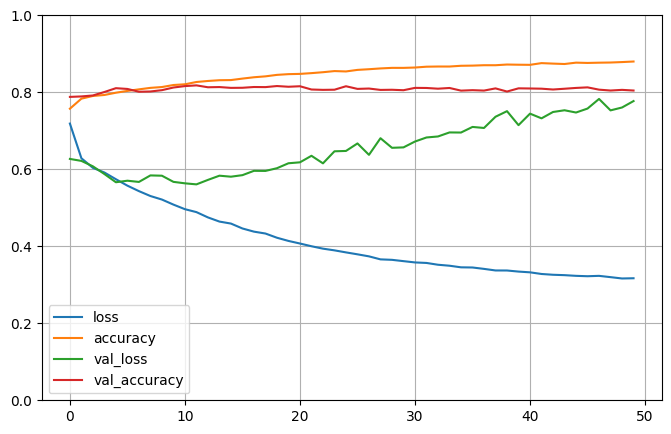

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Podejście 4

In [82]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(1000, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(500, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(100, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

save_best_model = ModelCheckpoint("wagi_wersja_4.h5", save_best_only=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              52000     
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500000    
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                        

In [83]:
# model.load_weights("wagi_wersja_4.h5")
# deep_results_test['DNN4'] = model.evaluate(X_test, y_test)[1]

296/296 [==============================] - 1s 4ms/step - loss: 0.5769 - accuracy: 0.8101


In [60]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=50, callbacks=[save_best_model])

Epoch 1/50
945/945 [==============================] - 18s 17ms/step - loss: 0.7774 - accuracy: 0.7449 - val_loss: 0.6485 - val_accuracy: 0.7854
Epoch 2/50
945/945 [==============================] - 16s 17ms/step - loss: 0.6743 - accuracy: 0.7706 - val_loss: 0.6254 - val_accuracy: 0.7870
Epoch 3/50
945/945 [==============================] - 15s 16ms/step - loss: 0.6525 - accuracy: 0.7768 - val_loss: 0.6091 - val_accuracy: 0.7981
Epoch 4/50
945/945 [==============================] - 15s 16ms/step - loss: 0.6353 - accuracy: 0.7833 - val_loss: 0.5927 - val_accuracy: 0.7997
Epoch 5/50
945/945 [==============================] - 15s 16ms/step - loss: 0.6256 - accuracy: 0.7867 - val_loss: 0.5901 - val_accuracy: 0.8003
Epoch 6/50
945/945 [==============================] - 15s 16ms/step - loss: 0.6195 - accuracy: 0.7884 - val_loss: 0.5950 - val_accuracy: 0.8049
Epoch 7/50
945/945 [==============================] - 15s 16ms/step - loss: 0.6050 - accuracy: 0.7882 - val_loss: 0.5817 - val_accuracy:

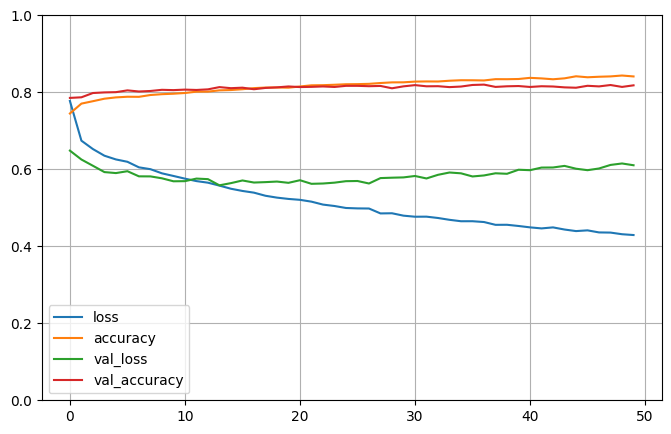

In [61]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Podejście 5

In [84]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(1000, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(500, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(200, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(100, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(25, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

save_best_model = ModelCheckpoint("wagi_wersja_5.h5", save_best_only=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              52000     
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500000    
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                        

In [85]:
# model.load_weights("wagi_wersja_5.h5")
# deep_results_test['DNN5'] = model.evaluate(X_test, y_test)[1]

296/296 [==============================] - 2s 4ms/step - loss: 0.5808 - accuracy: 0.8173


In [63]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=50, callbacks=[save_best_model])

Epoch 1/50
945/945 [==============================] - 22s 20ms/step - loss: 0.8152 - accuracy: 0.7332 - val_loss: 0.6488 - val_accuracy: 0.7864
Epoch 2/50
945/945 [==============================] - 18s 19ms/step - loss: 0.6989 - accuracy: 0.7646 - val_loss: 0.6342 - val_accuracy: 0.7846
Epoch 3/50
945/945 [==============================] - 18s 19ms/step - loss: 0.6768 - accuracy: 0.7722 - val_loss: 0.6252 - val_accuracy: 0.7946
Epoch 4/50
945/945 [==============================] - 18s 19ms/step - loss: 0.6608 - accuracy: 0.7745 - val_loss: 0.6165 - val_accuracy: 0.7875
Epoch 5/50
945/945 [==============================] - 18s 19ms/step - loss: 0.6525 - accuracy: 0.7782 - val_loss: 0.6124 - val_accuracy: 0.7940
Epoch 6/50
945/945 [==============================] - 18s 19ms/step - loss: 0.6402 - accuracy: 0.7818 - val_loss: 0.6061 - val_accuracy: 0.7995
Epoch 7/50
945/945 [==============================] - 17s 18ms/step - loss: 0.6291 - accuracy: 0.7853 - val_loss: 0.5983 - val_accuracy:

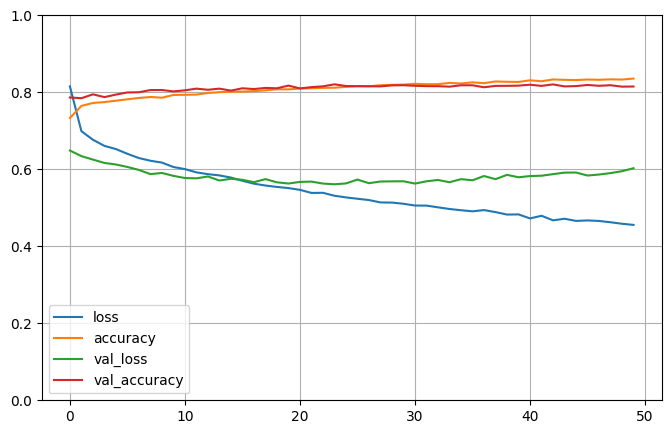

In [64]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Podejście 6

In [86]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(1000, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(500, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(200, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(100, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(25, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(6,activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

save_best_model = ModelCheckpoint("wagi_wersja_6.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              52000     
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500000    
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                        

In [87]:
# model.load_weights("wagi_wersja_6.h5")
# deep_results_test['DNN6'] = model.evaluate(X_test, y_test)[1]

296/296 [==============================] - 2s 4ms/step - loss: 0.5762 - accuracy: 0.8116


In [69]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=50, callbacks=[save_best_model, early_stopping])

Epoch 1/50
945/945 [==============================] - 18s 16ms/step - loss: 0.8129 - accuracy: 0.7384 - val_loss: 0.6451 - val_accuracy: 0.7832
Epoch 2/50
945/945 [==============================] - 16s 17ms/step - loss: 0.6776 - accuracy: 0.7745 - val_loss: 0.6267 - val_accuracy: 0.7866
Epoch 3/50
945/945 [==============================] - 16s 17ms/step - loss: 0.6553 - accuracy: 0.7780 - val_loss: 0.6167 - val_accuracy: 0.7905
Epoch 4/50
945/945 [==============================] - 17s 18ms/step - loss: 0.6398 - accuracy: 0.7816 - val_loss: 0.6101 - val_accuracy: 0.8002
Epoch 5/50
945/945 [==============================] - 16s 17ms/step - loss: 0.6253 - accuracy: 0.7864 - val_loss: 0.6024 - val_accuracy: 0.7998
Epoch 6/50
945/945 [==============================] - 17s 18ms/step - loss: 0.6154 - accuracy: 0.7884 - val_loss: 0.5889 - val_accuracy: 0.8040
Epoch 7/50
945/945 [==============================] - 17s 18ms/step - loss: 0.6052 - accuracy: 0.7910 - val_loss: 0.5905 - val_accuracy:

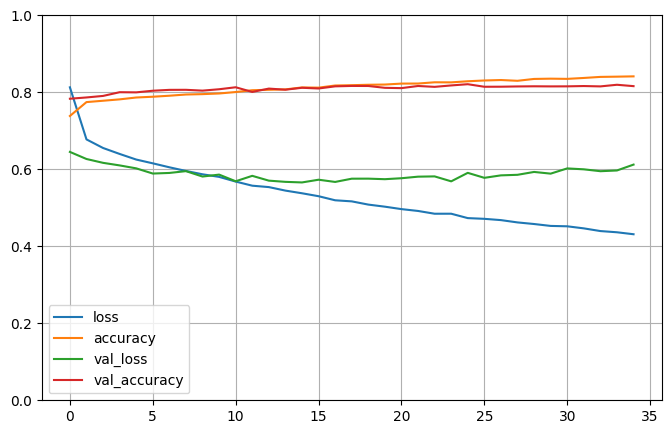

In [70]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Podejście 7

In [88]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(1000, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(700, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(500, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(300, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(200, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(100, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dense(25, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.1))
model.add(Dense(6,activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

save_best_model = ModelCheckpoint("wagi_wersja_7.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              52000     
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 700)               700000    
                                                                 
 batch_normalization_1 (Batc  (None, 700)              2800      
 hNormalization)                                        

In [89]:
# model.load_weights("wagi_wersja_7.h5")
# deep_results_test['DNN7'] = model.evaluate(X_test, y_test)[1]

296/296 [==============================] - 2s 6ms/step - loss: 0.5750 - accuracy: 0.8162


In [72]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=100, callbacks=[save_best_model, early_stopping])

Epoch 1/100
945/945 [==============================] - 29s 27ms/step - loss: 0.8030 - accuracy: 0.7332 - val_loss: 0.6610 - val_accuracy: 0.7782
Epoch 2/100
945/945 [==============================] - 24s 25ms/step - loss: 0.6837 - accuracy: 0.7671 - val_loss: 0.6446 - val_accuracy: 0.7877
Epoch 3/100
945/945 [==============================] - 24s 25ms/step - loss: 0.6635 - accuracy: 0.7746 - val_loss: 0.6212 - val_accuracy: 0.7925
Epoch 4/100
945/945 [==============================] - 24s 25ms/step - loss: 0.6538 - accuracy: 0.7755 - val_loss: 0.6097 - val_accuracy: 0.7932
Epoch 5/100
945/945 [==============================] - 24s 26ms/step - loss: 0.6415 - accuracy: 0.7795 - val_loss: 0.6066 - val_accuracy: 0.7930
Epoch 6/100
945/945 [==============================] - 23s 24ms/step - loss: 0.6304 - accuracy: 0.7826 - val_loss: 0.6033 - val_accuracy: 0.8012
Epoch 7/100
945/945 [==============================] - 21s 22ms/step - loss: 0.6196 - accuracy: 0.7892 - val_loss: 0.6040 - val_ac

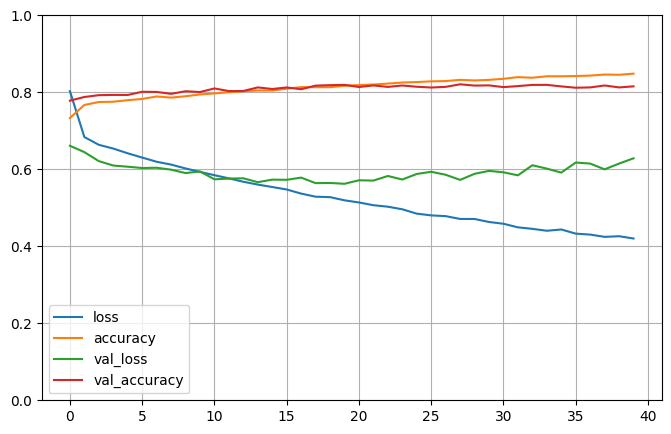

In [73]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Podejście 8

In [128]:
keras.backend.clear_session()

history = History()
model = Sequential()
model.add(Dense(1000, use_bias=False, input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(700, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(500, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(300, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(200, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(100, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(25, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(6, activation="softmax"))
model.summary()

model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

save_best_model = ModelCheckpoint("wagi_wersja_8.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              52000     
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 1000)              0         
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 700)               700000    
                                                                 
 batch_normalization_1 (Batc  (None, 700)              2800      
 hNormalization)                                        

In [131]:
model.load_weights("wagi_wersja_8.h5")
deep_results_test['DNN8'] = model.evaluate(X_test, y_test)[1]

296/296 [==============================] - 4s 12ms/step - loss: 0.5785 - accuracy: 0.8160


In [129]:
history = model.fit(X_train, y_train, validation_data= (X_valid, y_valid), batch_size=32, epochs=100, callbacks=[save_best_model, early_stopping])

Epoch 1/100
945/945 [==============================] - 34s 32ms/step - loss: 0.8978 - accuracy: 0.7100 - val_loss: 0.6742 - val_accuracy: 0.7840
Epoch 2/100
945/945 [==============================] - 28s 30ms/step - loss: 0.7218 - accuracy: 0.7622 - val_loss: 0.6368 - val_accuracy: 0.7868
Epoch 3/100
945/945 [==============================] - 30s 32ms/step - loss: 0.6953 - accuracy: 0.7666 - val_loss: 0.6339 - val_accuracy: 0.7881
Epoch 4/100
945/945 [==============================] - 31s 32ms/step - loss: 0.6814 - accuracy: 0.7743 - val_loss: 0.6277 - val_accuracy: 0.7844
Epoch 5/100
945/945 [==============================] - 31s 32ms/step - loss: 0.6688 - accuracy: 0.7735 - val_loss: 0.6362 - val_accuracy: 0.7780
Epoch 6/100
945/945 [==============================] - 30s 32ms/step - loss: 0.6600 - accuracy: 0.7783 - val_loss: 0.6126 - val_accuracy: 0.7918
Epoch 7/100
945/945 [==============================] - 30s 32ms/step - loss: 0.6570 - accuracy: 0.7784 - val_loss: 0.6055 - val_ac

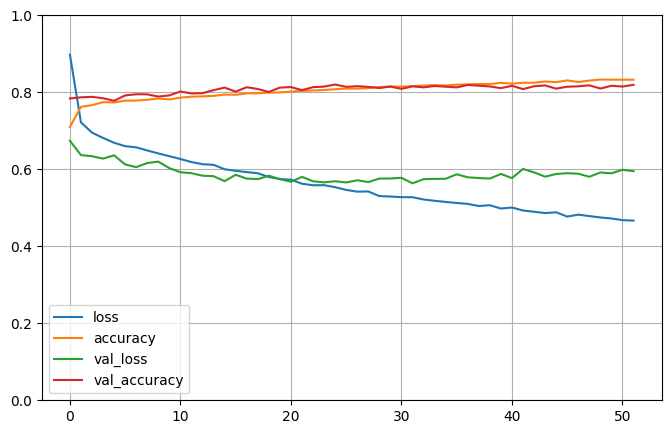

In [130]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Podsumowanie

In [132]:
labels, values = tuple(zip(*sorted(deep_results_test.items(), key=lambda x: x[1])))

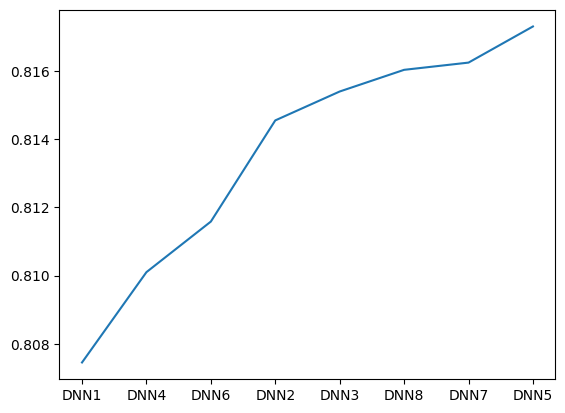

In [133]:
plt.plot(np.arange(len(values)), values)
plt.xticks(ticks=np.arange(len(values)), labels=labels);

In [134]:
import json

In [135]:
with open('deep.json', 'w') as f:
    json.dump(dict(zip(labels, values)), f, ensure_ascii=False)

In [136]:
with open('shallow.json', 'r') as f:
    exec('shallow =' + f.read())

In [137]:
shallow_results = [(x[0], x[1][1]) for x in shallow.items()]

In [138]:
labels, values = tuple(zip(*sorted(list(deep_results_test.items())+shallow_results, key=lambda x: x[1])))

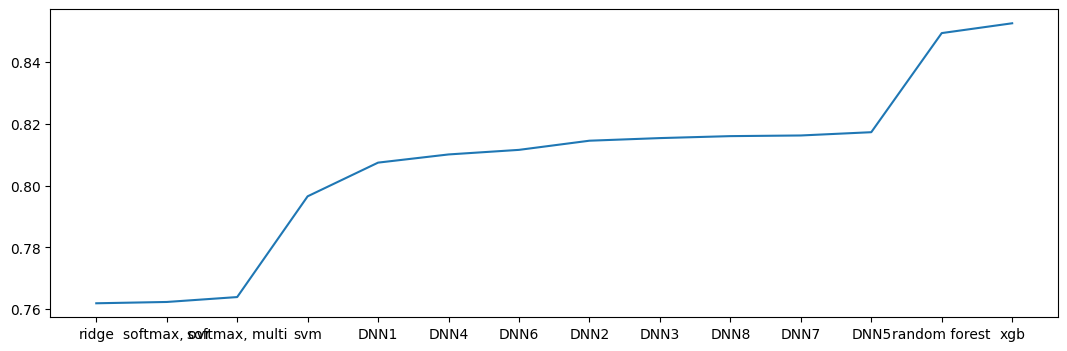

In [139]:
fig = plt.figure(figsize=(13,4))
plt.plot(np.arange(len(values)), values)
plt.xticks(ticks=np.arange(len(values)), labels=labels);